#### Brenna Manning and Emily Wang | Change the World : Drug Abuse and Health | Data Science 2016

Feb 27, 2016

## Day 1 of ~EXPLORATION~

Goals:
* Load data
* Ask some questions
* Make some visualizations

In [24]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
import numpy as np
import pprint as pp
from IPython.display import display

#### Change in project direction

We realized that the neuroimaging dataset was not the most compatible for our goal of exploring mental health with the population at large. As such, we took some time to explore other datasets in this realm: survey on mental health facilities in the US, survey on drug abuse, and others. We pivoted to drug abuse and health dataset, because it has a wide range of features that will enable us to explore most of the various axes of diversity (age, ability, health, gender, era, etc.) that we were interested in pursuing in this project.

Without further ado, let's load the data!

#### Load data

[Here's the link to the dataset webpage.](http://www.icpsr.umich.edu/icpsrweb/ICPSR/studies/34933)

In [4]:
df = pd.read_table('data/ICPSR_34933/DS0001/34933-0001-Data.tsv')

In [5]:
# pp.pprint(df.columns.values.tolist())

### Round 1

Let's practice doing some data visualizations just on the smoking features.

Some questions/curiosities:
* Trend between age first smoked and agae at the time of survey
* Trends of drug abuse impacting personal lives
* Difference trends for people from different background (age, gender, sexuality, etc)

#### CIGTRY vs. CIGYFU

Is there a trend between age first smoked and year of first cig use?

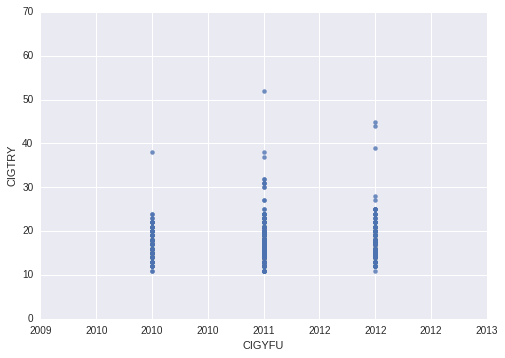

In [6]:
# CIGTRY: age of first smoked cig
# CIGYFU: year of first cig use

sns.regplot(x=df.CIGYFU, y=df.CIGTRY, fit_reg=False)
axes = plt.gca()
axes.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axes.set_xlim([2009, 2013])
axes.set_ylim([0,70])
plt.show()

It turns out that this isn't very interesting... this data only contains samples where the individuals' year of first cig use is sometime between 2010 and 2012. 

#### CIGTRY vs. CIG30USE

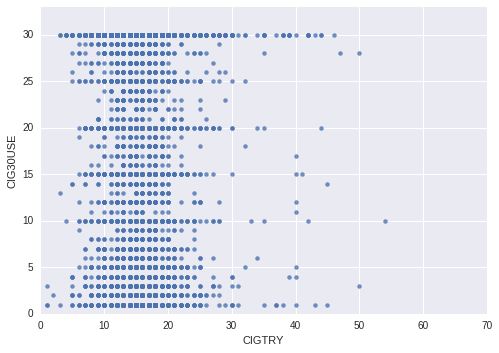

In [7]:
# CIGTRY: age of first smoked cig
# CIG30USE: how many smoked in the last month 

sns.regplot(x="CIGTRY", y="CIG30USE", data=df, fit_reg=False)
axes = plt.gca()
axes.set_xlim([0, 70])
axes.set_ylim([0, 33])
plt.show()

^ This is the whole picture... however...

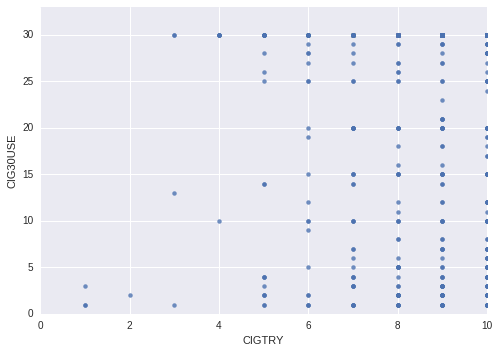

In [8]:
sns.regplot(x="CIGTRY", y="CIG30USE", data=df, fit_reg=False)
axes = plt.gca()
axes.set_xlim([0, 10])
axes.set_ylim([0, 33])
plt.show()

^ We're seeing some points for children under 10 years old trying cigarettes. While *maybe* the young children tried cigarettes, we find it unlikely that 3 and 4 year olds have smoked 30/30 days in the past month... We suspect that the survey was falsely answered OR that was secondhand smoking. :(

Scatterplots are good for quick visualizations and seeing how things may relate to each other.

BRENNA TOOK THIS SURVEY AS A HIGH SCHOOL STUDENT??

#### Counts of drug usage

Let's visualize the counts of each drug being used. We have a suspicion that some individuals use more than one drug regularly, and will follow up on that thought afterwards.

In [9]:
def drug_ever(df, drugstr):
    """
    returns (# of participants who have used the drug) 
    divided by (# of respondents to corresponding question) 
    for the given dataframe and drugstr
    """
    counts = df[drugstr].value_counts()
    return counts[1]/float(counts.sum())

In [10]:
majordrug_names = ['Tobacco', 'Alcohol', 'Marijuana', 'Cocaine', 'Heroin']
hallucinogen_names = ['LSD', 'PCP', 'Peyote', 'Mescaline', 'Psilocybin', 'Ecstasy', 'OtherHallucinogens']
inhalant_names = ['AmylNitrate', 'CorrectionFluid', 'Gasoline', 'Glue', 'Halothane', 
                  'LacquerThinner', 'LighterGas', 'NitrousOxide', 'SprayPaint', 'OtherAerosol', 'OtherInhalants']
painreliever_names = ['Darvocet', 'Percocet', 'Vicodin', 'BelowRedCard', 
                      'Codeine', 'Demerol', 'Dilaudid', 'Fioricet', 
                      'Fiorinal', 'Hydrocodone', 'Methadone', 'Morphine', 
                      'Oxycontin', 'Phencod', 'Propoxyphene', 'SK65',
                      'Stadol', 'Talacen', 'Talwin', 'Talwinnx', 
                      'Tramadol', 'Ultram', 'OtherPainRelievers']

# TODO: Tranquilizers, Stimulants, Sedatives

majordrug_features = ['CIGEVER', 'ALCEVER', 'MJEVER', 'COCEVER', 'HEREVER']
hallucinogen_features = ['LSD', 'PCP', 'PEYOTE', 'MESC', 'PSILCY', 'ECSTASY', 'HALNOLST'] 
inhalant_features = ['AMYLNIT', 'CLEFLU', 'GAS', 'GLUE', 'ETHER', 
                     'SOLVENT', 'LGAS', 'NITOXID', 'SPPAINT', 'AEROS', 'INHNOLST']
painreliever_features = ['DARVTYLC', 'PERCTYLX', 'VICOLOR', 'ANLCARD', 
                        'CODEINE', 'DEMEROL', 'DILAUD', 'FIORICET',
                        'FIORINAL', 'HYDROCOD', 'METHDON', 'MORPHINE', 
                        'OXYCONTN', 'PHENCOD', 'PROPOXY', 'SK65A', 
                        'STADOL', 'TALACEN', 'TALWIN', 'TALWINNX',
                        'TRAMADOL', 'ULTRAM', 'ANLNOLST']


drugnames = majordrug_names + hallucinogen_names + inhalant_names + painreliever_names
featurenames = majordrug_features + hallucinogen_features + inhalant_features + painreliever_features
                
drug_ever_proportions = [drug_ever(df, x) for x in featurenames]
drug_ever_df = pd.DataFrame({
                              'Name': pd.Series(drugnames, index=range(len(drugnames))), 
                              'DrugEver': pd.Series(drug_ever_proportions, index=range(len(drugnames)))
                            }) 

/home/brenna/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


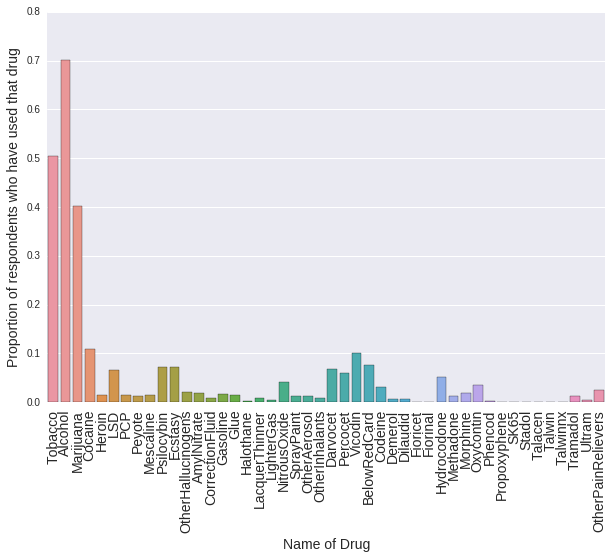

In [11]:
plt.figure(figsize=(10, 7))
sns.barplot(x=drug_ever_df.Name, y=drug_ever_df.DrugEver)
plt.xlabel('Name of Drug', fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('Proportion of respondents who have used that drug', fontsize=14)
plt.show()

### Investigating the trends with drug abuse and mental health

#### Do individuals still engage in drug abuse even after family/friends intervene?
#### Adult Depression features in dataset
#### Adolescent Depression features in dataset
#### Youth Mental Health features in dataset

Day 2 of Exploration


[203, 430, 1219, 2516, 8001]


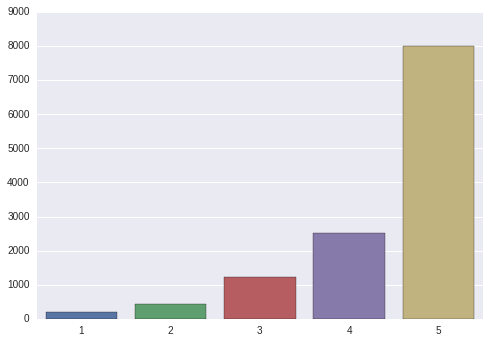

In [12]:
df2 = df.groupby(['ALCDAYS', 'DSTNGD30'])
dff = df2['ALCDAYS'].count()

# print (dff[0:8])
# print dff[1, 1]

onecounts = 0
twocounts = 0
threecounts = 0
fourcounts = 0
fivecounts = 0

for a in range(1, 6):
    onecounts += dff[a, 1]
    twocounts += dff[a, 2]
    threecounts += dff[a, 3]
    fourcounts += dff[a, 4]
    fivecounts += dff [a, 5]

agg =  [onecounts, twocounts, threecounts, fourcounts, fivecounts]    
print agg 
sns.barplot(x=[1, 2, 3, 4, 5], y=agg)

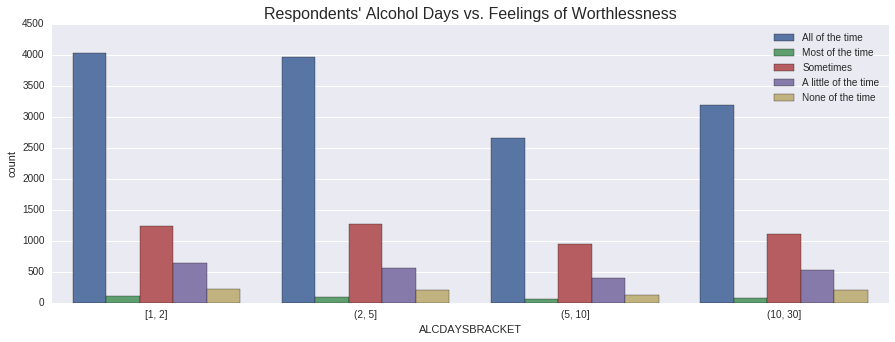

In [13]:
df_alcdays= df[df.ALCDAYS < 31]
df_alcdays= df_alcdays[df_alcdays.DSTNGD30 <6]
df_alcdays['ALCDAYSBRACKET']=pd.qcut(df_alcdays.ALCDAYS, 4)

fig, (axis1) = plt.subplots(figsize=(15,5))
sns.countplot(x='ALCDAYSBRACKET', hue="DSTNGD30", data=df_alcdays, ax=axis1)
plt.title("Respondents' Alcohol Days vs. Feelings of Worthlessness", fontsize=16)
plt.legend(["All of the time", "Most of the time", "Sometimes", "A little of the time", "None of the time"])
plt.show()

In [14]:
def mental_health_bars30(df, s30, emotion, substancestr, emotionstr):
    """
    df: dataframe of interest

    s30: subtance of interest
    emotion: mental health aspect of interest

    for the sake of plot labelling:
    substance: human readable string of the substance
    emotionstr: human readable string of the mental health aspect
    """
    
    df.loc[df[s30] == 91, s30] = 0 # never had alcohol
    df.loc[df[s30] == 93, s30] = 0 # haven't had alcohol in the past month
    df_subset = df[df[s30] < 31]
    
    df_subset= df_subset[df_subset[emotion] <6]
    df_subset['BRACKET']=pd.cut(df_subset[s30], 4)
    # replace cut with what we want...
    print df_subset['BRACKET'].value_counts()

    fig, (axis1) = plt.subplots(figsize=(15,5))
    sns.countplot(x='BRACKET', hue=emotion, data=df_subset, ax=axis1)
    plt.title("Respondents' %s Days vs. Feelings of %s" % (substancestr, emotionstr), fontsize=16)
    plt.legend(["All of the time", "Most of the time", "Sometimes", "A little of the time", "None of the time"])
    plt.show()

    return

(-0.03, 7.5]    29431
(7.5, 15]        4722
(15, 22.5]       1532
(22.5, 30]       1440
dtype: int64


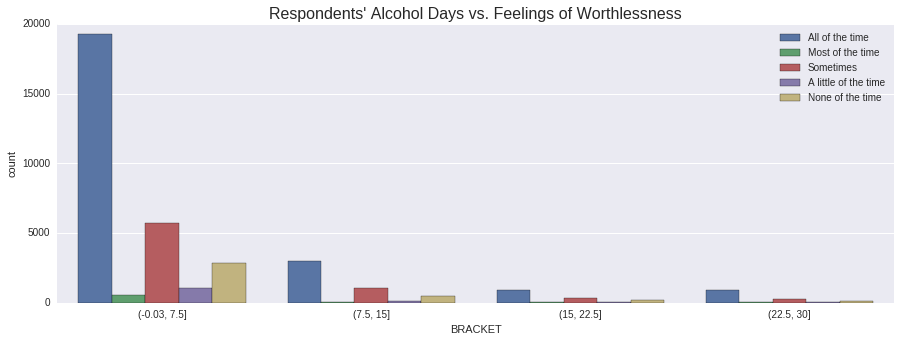

In [15]:
mental_health_bars30(df, "ALCDAYS", "DSTNGD30", "Alcohol", "Worthlessness")

(-0.03, 7.5]    29430
(7.5, 15]        4722
(15, 22.5]       1533
(22.5, 30]       1439
dtype: int64


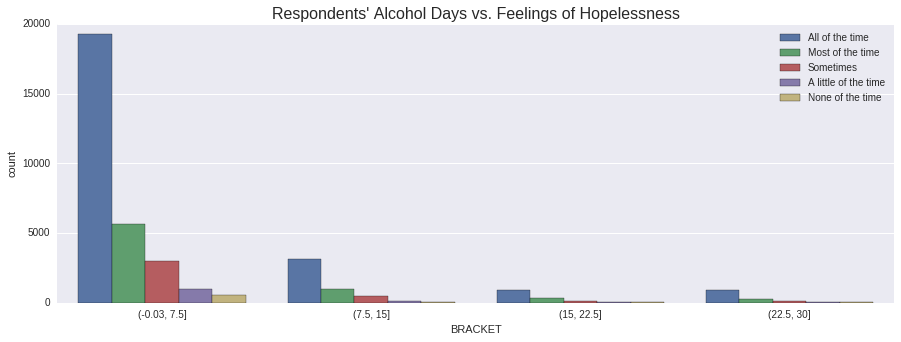

In [16]:
mental_health_bars30(df, "ALCDAYS", "DSTHOP30", "Alcohol", "Hopelessness")

### 3/1 Tuesday Check-in with Paul

- Portfolio or presentation? Choose based on what is most impactful (spoken medium or 1on1 reading portfolio), have your audience in mind. 
- Exact assessment style and criteria TBD
- Subtle difference: Brenna and I brainstormed what we wanted this project to be VS. being handed a dataset and finding the story in it; Be aware of the bias/conflict of interests sometimes 
- (y) Good choice in switching datasets
- Start with the code visualizations, if there is a compelling visualization and time, then turn it into a more compelling expressive art piece

### Working today

Argh!! The bins aren't the same size in the bar plots above. Currently investigating how to make them of equal size so the bars are not misleading.

Actually, we now realize that it may be an issue of # of bins available -- qcut doesn't want to put "part of a day #'s data" into more than one bin. Makes sense; let's try increasing the # of bins.

### Other big-picture visualizations

#### y axis: emotional/personal impact
* Physical harm
* Emotional harm
* Hurts personal relationships
* Continue doing it despite it hurting your relationships

#### x axis
* Frequency of use
* Time-based features


### Clarifying the project pivot
* The central focus is correlations between mental health and susbtance abuse
* We can't have the central focus be mental health awareness if we have a substance abuse survey
* Be careful -- we're not trying to make casual relationship claims

### Next iterations of these exploratory barplots


#### Design Decision: Bins

Our arbitrary scale, based on how people casually talk about... consuming things.

Things will be on relative frequencies either way.

* Never: 0 Days
* Rarely Consumed: 1-2 Days
* Weekly Consumed: 3-6 Days
* Biweekly: 7-12 Days
* Frequently: 13-19 Days 
* Most Days: 20-26 days
* Daily: 27-30 Days

In [17]:
def mental_health_bars30_freq(df, s30, emotion, substancestr, emotionstr):
    """
    let's use relative frequencies and bin up the data based on the design decision described above.
    
    df: dataframe of interest

    s30: subtance of interest
    emotion: mental health aspect of interest

    for the sake of plot labelling:
    substance: human readable string of the substance
    emotionstr: human readable string of the mental health aspect
    """
    
    # convert 91 and 93 to 0 days (easier to understand when looking at plot)
    df.loc[df[s30] == 91, s30] = 0 # never had alcohol
    df.loc[df[s30] == 93, s30] = 0 # haven't had alcohol in the past month
    df_subset = df[df[s30] < 31]
    
    # 
    df_subset= df_subset[df_subset[emotion] < 6]
    
    #df_subset['BRACKET']=pd.cut(df_subset[s30], 4)
    #replace cut with what we want...
    df_subset['BRACKET'] = df_subset[s30]
    
    df_subset.loc[df_subset[s30] >= 27, 'BRACKET'] = 6 #  27-30 days of drinking per month    
    df_subset.loc[df_subset[s30] < 27, 'BRACKET'] = 5 #  20-27 days of drinking per month
    df_subset.loc[df_subset[s30] < 20, 'BRACKET'] = 4 #  13-19 days of drinking per month
    df_subset.loc[df_subset[s30] < 13, 'BRACKET'] = 3 #  7-12 days of drinking per month
    df_subset.loc[df_subset[s30] < 7, 'BRACKET'] = 2 #  3-6 days of drinking per month
    df_subset.loc[df_subset[s30] < 3, 'BRACKET'] = 1 # 1 or 2 days of drinking per month
    df_subset.loc[df_subset[s30] == 0, 'BRACKET'] = 0 # never had alcohol
        
    grouped = df_subset.groupby('BRACKET')
    bracket_counts = grouped[emotion].value_counts(normalize=True)
    # display(bracket_counts)
        
    bracket_data = [{'BRACKET': br, emotion: em, 'percentage': percentage*100}
                    for (br, em), percentage in dict(bracket_counts).items()
                   ]
    
    plotting_df = pd.DataFrame(bracket_data)
    #display(plotting_df)
    
    p, ax = plt.subplots()
    p = sns.barplot(x="BRACKET", y="percentage", hue=emotion, data=plotting_df, order=[0, 1, 2, 3, 4, 5, 6, 7], hue_order=[1, 2, 3, 4, 5])
    _ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    ax.set_xticklabels(['Never', 'Rarely', 'Weekly', 'Biweekly', 'Frequently', 'Heavily', 'Daily'])
    plt.xlabel('Days Consumed Substance of Last 30')
    plt.ylabel('Percentage of Respondents in Frequency Bracket')
    title = substancestr + emotionstr
    plt.title(title)
    plt.show()
    
    return


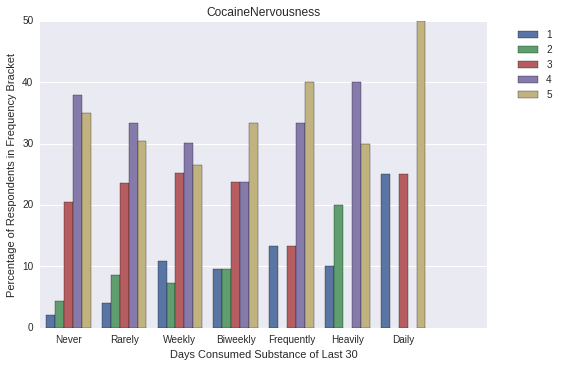

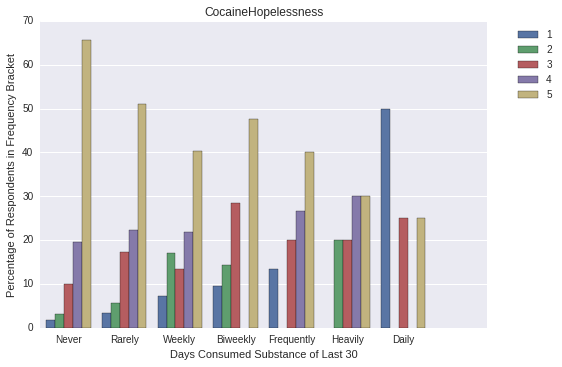

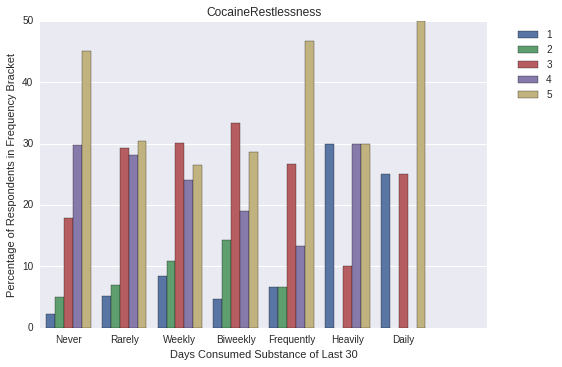

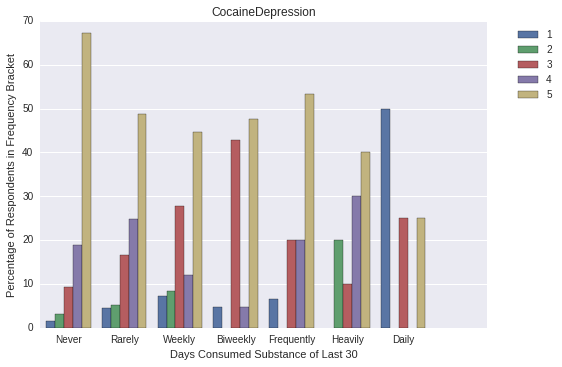

In [18]:
mental_health_bars30_freq(df, "COCUS30A", "DSTNRV30", "Cocaine", "Nervousness")
mental_health_bars30_freq(df, "COCUS30A", "DSTHOP30", "Cocaine", "Hopelessness")
mental_health_bars30_freq(df, "COCUS30A", "DSTRST30", "Cocaine", "Restlessness")
mental_health_bars30_freq(df, "COCUS30A", "DSTCHR30", "Cocaine", "Depression")


This plot above is interesting and not what we would have expected. Explore this more!

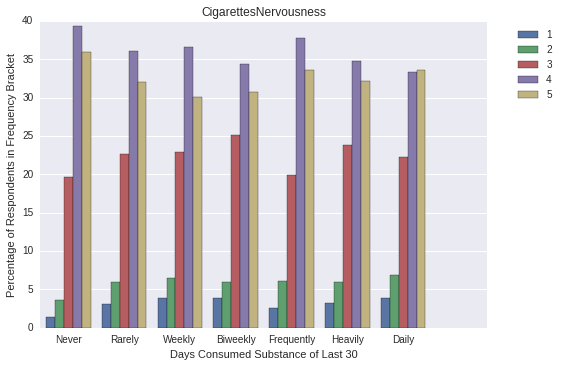

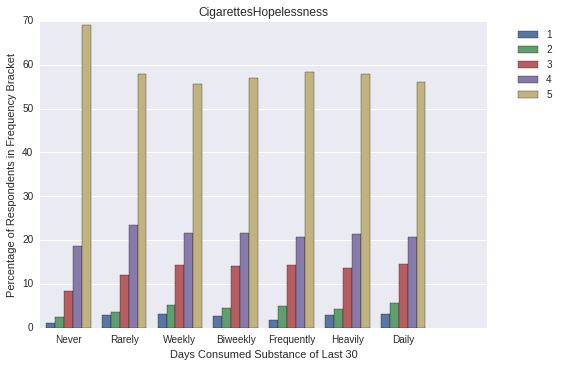

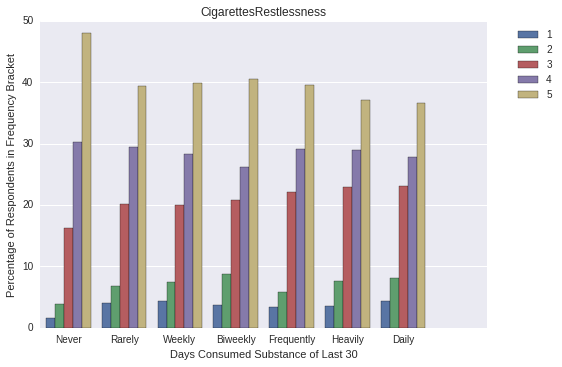

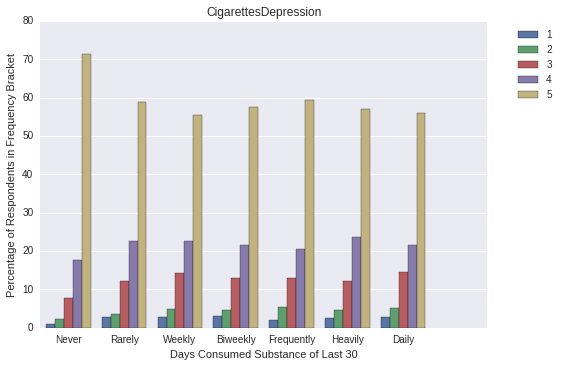

In [19]:
mental_health_bars30_freq(df, "CIG30USE", "DSTNRV30", "Cigarettes", "Nervousness")
mental_health_bars30_freq(df, "CIG30USE", "DSTHOP30", "Cigarettes", "Hopelessness")
mental_health_bars30_freq(df, "CIG30USE", "DSTRST30", "Cigarettes", "Restlessness")
mental_health_bars30_freq(df, "CIG30USE", "DSTCHR30", "Cigarettes", "Depression")


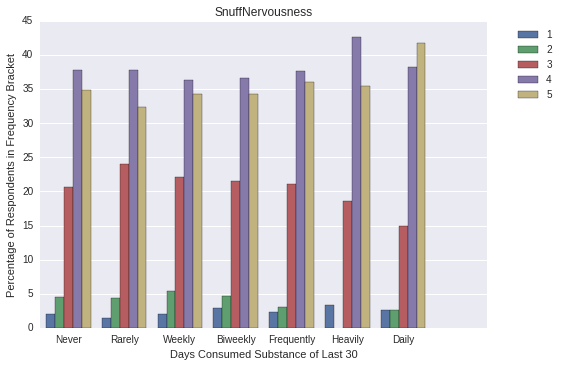

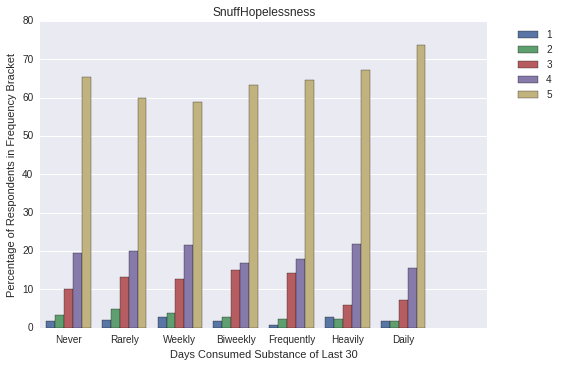

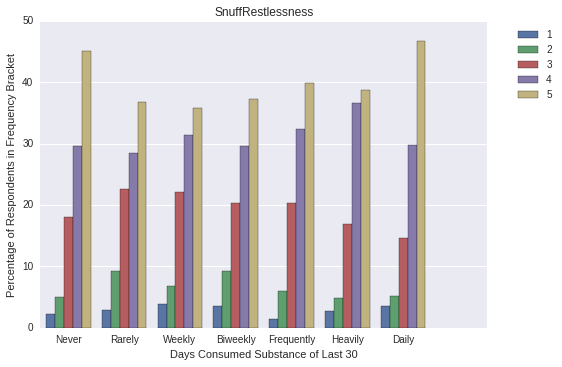

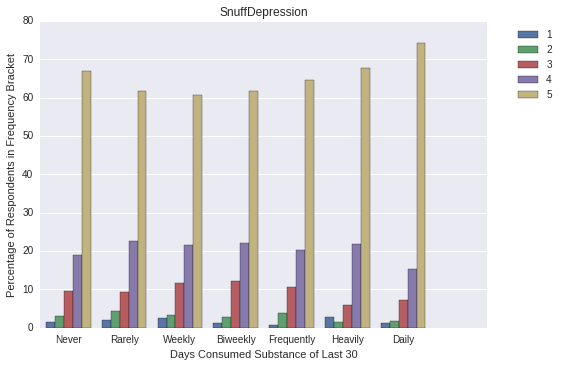

In [20]:
mental_health_bars30_freq(df, "SNF30USE", "DSTNRV30", "Snuff", "Nervousness")
mental_health_bars30_freq(df, "SNF30USE", "DSTHOP30", "Snuff", "Hopelessness")
mental_health_bars30_freq(df, "SNF30USE", "DSTRST30", "Snuff", "Restlessness")
mental_health_bars30_freq(df, "SNF30USE", "DSTCHR30", "Snuff", "Depression")


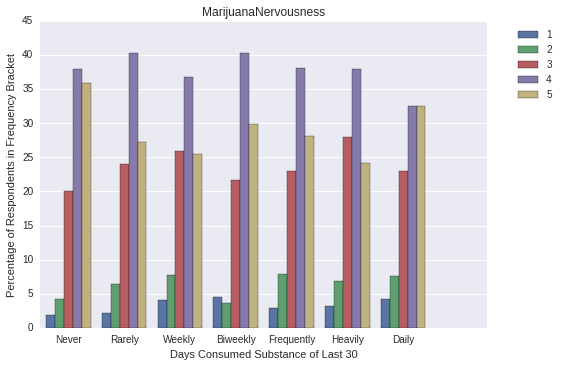

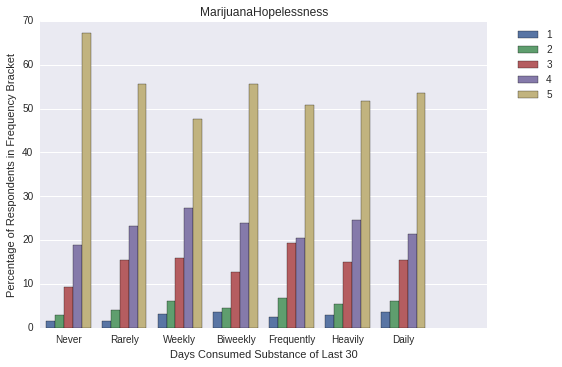

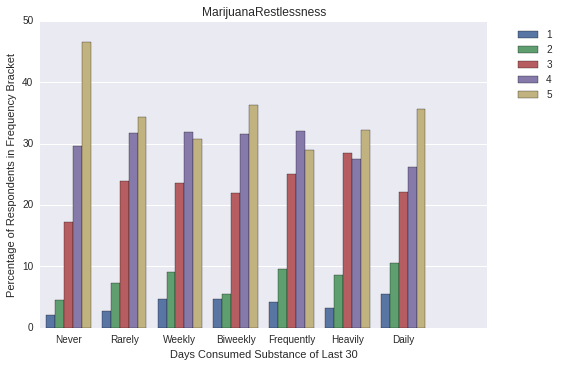

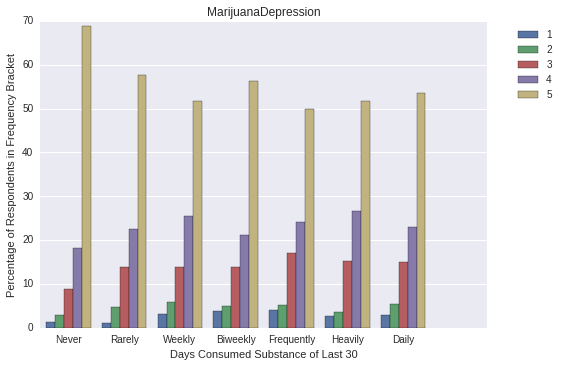

In [21]:
mental_health_bars30_freq(df, "MJDAY30A", "DSTNRV30", "Marijuana", "Nervousness")
mental_health_bars30_freq(df, "MJDAY30A", "DSTHOP30", "Marijuana", "Hopelessness")
mental_health_bars30_freq(df, "MJDAY30A", "DSTRST30", "Marijuana", "Restlessness")
mental_health_bars30_freq(df, "MJDAY30A", "DSTCHR30", "Marijuana", "Depression")


In [23]:
def mental_health_lines_ratios(df, s30, emotion, substancestr, emotionstr):
    """
    let's use relative frequencies and bin up the data based on the design decision described above.
    
    df: dataframe of interest

    s30: subtance of interest
    emotion: mental health aspect of interest

    for the sake of plot labelling:
    substance: human readable string of the substance
    emotionstr: human readable string of the mental health aspect
    """
    
    # convert 91 and 93 to 0 days (easier to understand when looking at plot)
    df.loc[df[s30] == 91, s30] = 0 # never had alcohol
    df.loc[df[s30] == 93, s30] = 0 # haven't had alcohol in the past month
    df_subset = df[df[s30] < 31]
    
    # 
    df_subset= df_subset[df_subset[emotion] < 6]
    
    #df_subset['BRACKET']=pd.cut(df_subset[s30], 4)
    #replace cut with what we want...
    df_subset['BRACKET'] = df_subset[s30]
    
    df_subset.loc[df_subset[s30] >= 27, 'BRACKET'] = 6 #  27-30 days of drinking per month    
    df_subset.loc[df_subset[s30] < 27, 'BRACKET'] = 5 #  20-27 days of drinking per month
    df_subset.loc[df_subset[s30] < 20, 'BRACKET'] = 4 #  13-19 days of drinking per month
    df_subset.loc[df_subset[s30] < 13, 'BRACKET'] = 3 #  7-12 days of drinking per month
    df_subset.loc[df_subset[s30] < 7, 'BRACKET'] = 2 #  3-6 days of drinking per month
    df_subset.loc[df_subset[s30] < 3, 'BRACKET'] = 1 # 1 or 2 days of drinking per month
    df_subset.loc[df_subset[s30] == 0, 'BRACKET'] = 0 # never had alcohol
        
    grouped = df_subset.groupby('BRACKET')
    bracket_counts = grouped[emotion].value_counts(normalize=True)
    # display(bracket_counts)
        
    bracket_data = [{'BRACKET': br, emotion: em, 'percentage': percentage*100}
                    for (br, em), percentage in dict(bracket_counts).items()
                   ]
    
    #reference = 
    #ratios_df = pd.DataFrame(bracket_data)
    
    plotting_df = pd.DataFrame(bracket_data)
    #display(plotting_df)
        
    reference = plotting_df[plotting_df['BRACKET' == 0]]
    
    #p, ax = plt.subplots()
    #p = sns.barplot(x="BRACKET", y="percentage", hue=emotion, data=plotting_df, order=[0, 1, 2, 3, 4, 5, 6, 7], hue_order=[1, 2, 3, 4, 5])
    #_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    #ax.set_xticklabels(['Never', 'Rarely', 'Weekly',o 'Biweekly', 'Frequently', 'Heavily', 'Daily'])
    #plt.xlabel('Days Consumed Substance of Last 30')
    #plt.ylabel('Percentage of Respondents in Frequency Bracket')
    #title = substancestr + emotionstr
    #plt.title(title)
    #plt.show()
    
    #return

mental_health_lines_ratios(df, "CIG30USE", "DSTCHR30", "Cigarettes", "Depression")


KeyError: False